<a href="https://colab.research.google.com/github/jae-yong-2/ML_STUDY/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.datasets import load_breast_cancer
breast=load_breast_cancer()

In [3]:
x_train, x_test , y_train, y_test = train_test_split(breast.data, breast.target, test_size=0.3,random_state=2021)

In [4]:
x_train

array([[1.130e+01, 1.819e+01, 7.393e+01, ..., 1.218e-01, 3.308e-01,
        1.297e-01],
       [2.156e+01, 2.239e+01, 1.420e+02, ..., 2.216e-01, 2.060e-01,
        7.115e-02],
       [1.225e+01, 2.244e+01, 7.818e+01, ..., 6.335e-02, 3.100e-01,
        8.203e-02],
       ...,
       [1.471e+01, 2.159e+01, 9.555e+01, ..., 1.834e-01, 3.698e-01,
        1.094e-01],
       [9.606e+00, 1.684e+01, 6.164e+01, ..., 8.120e-02, 2.982e-01,
        9.825e-02],
       [8.950e+00, 1.576e+01, 5.874e+01, ..., 3.846e-02, 1.652e-01,
        7.722e-02]])

In [5]:
x_train=pd.read_csv(os.path.join('/content/drive/My Drive/Colab Notebooks/09_DFN_x_train.csv'))
x_test=pd.read_csv(os.path.join('/content/drive/My Drive/Colab Notebooks/09_DFN_x_test.csv'))

y_train=pd.read_csv(os.path.join('/content/drive/My Drive/Colab Notebooks/09_DFN_y_train.csv'))
y_test=pd.read_csv(os.path.join('/content/drive/My Drive/Colab Notebooks/09_DFN_y_test.csv'))

In [6]:
x_train=np.array(x_train)
y_train=np.array(y_train).reshape(-1)

x_test=np.array(x_test)
y_test=np.array(y_test).reshape(-1)

In [7]:
y_test.size

11843

In [8]:
score=pd.DataFrame(index=['train','test'])
pre=pd.DataFrame(index=['train','test'])

#아무런 세팅없이 기본으로 하기

In [9]:
DT=tree.DecisionTreeClassifier()
DT=DT.fit(x_train,y_train)

In [10]:
np.mean(DT.predict(x_train)==np.array(y_train))

1.0

In [11]:
np.mean(DT.predict(x_test)==np.array(y_test))

0.9943426496664697

feature_importances_를 이용해서 해보기

[Text(168.873799646955, 212.91, 'X[0] <= 3055.5\ngini = 0.638\nsamples = 35527\nvalue = [7120, 13025, 15382]'),
 Text(166.9826081200353, 203.85, 'X[0] <= 2675.5\ngini = 0.461\nsamples = 20211\nvalue = [7120, 13025, 66]'),
 Text(64.81394086496029, 194.79, 'X[10] <= 0.5\ngini = 0.111\nsamples = 12654\nvalue = [745, 11909, 0]'),
 Text(62.9227493380406, 185.73, 'X[0] <= 2550.5\ngini = 0.073\nsamples = 12376\nvalue = [467, 11909, 0]'),
 Text(9.455957634598413, 176.67, 'X[0] <= 2537.5\ngini = 0.003\nsamples = 9883\nvalue = [16, 9867, 0]'),
 Text(3.782383053839365, 167.60999999999999, 'X[0] <= 2525.5\ngini = 0.001\nsamples = 9593\nvalue = [3, 9590, 0]'),
 Text(1.8911915269196824, 158.55, 'gini = 0.0\nsamples = 9321\nvalue = [0, 9321, 0]'),
 Text(5.673574580759047, 158.55, 'X[3] <= 385.5\ngini = 0.022\nsamples = 272\nvalue = [3, 269, 0]'),
 Text(3.782383053839365, 149.49, 'gini = 0.0\nsamples = 269\nvalue = [0, 269, 0]'),
 Text(7.56476610767873, 149.49, 'gini = 0.0\nsamples = 3\nvalue = [3, 0,

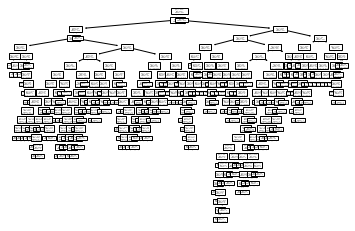

In [12]:
tree.plot_tree(DT)

In [13]:
DT.get_n_leaves()

207

In [14]:
importance=DT.feature_importances_.argsort()[::-1]

In [15]:
importance

array([ 0, 10,  5,  1,  3,  4,  9,  2,  7, 12, 26, 46, 24,  8, 33, 37,  6,
       44, 23, 17, 15, 36, 45, 41, 43, 14, 13, 42, 11, 47, 48, 49, 50, 51,
       16, 21, 18, 19, 40, 39, 38, 35, 34, 32, 31, 30, 29, 28, 27, 52, 25,
       22, 20, 53])

In [16]:
importance_D=[importance[0],importance[1],importance[2]]
X_train = pd.DataFrame(x_train).iloc[:,importance_D]
X_test = pd.DataFrame(x_test).iloc[:,importance_D]

In [17]:
X_train

,0,10,5
0,2321,0,1075
1,3420,0,2666
2,2722,0,1768
3,3409,0,778
4,3437,0,1543
...,...,...,...
35522,3136,1,481
35523,2752,0,2580
35524,3373,0,2837
35525,2752,1,162


In [18]:
DT_nD=tree.DecisionTreeClassifier()

In [19]:
DT_nD.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
DT_nD.score(X_test,y_test)

0.9591319766950942

[Text(134.52099766582856, 214.33371428571428, 'X[0] <= 3055.5\ngini = 0.638\nsamples = 35527\nvalue = [7120, 13025, 15382]'),
 Text(134.17257657896394, 208.12114285714284, 'X[0] <= 2675.5\ngini = 0.461\nsamples = 20211\nvalue = [7120, 13025, 66]'),
 Text(38.09511630459527, 201.90857142857143, 'X[1] <= 0.5\ngini = 0.111\nsamples = 12654\nvalue = [745, 11909, 0]'),
 Text(37.74669521773066, 195.696, 'X[0] <= 2550.5\ngini = 0.073\nsamples = 12376\nvalue = [467, 11909, 0]'),
 Text(2.264737064619988, 189.48342857142856, 'X[0] <= 2537.5\ngini = 0.003\nsamples = 9883\nvalue = [16, 9867, 0]'),
 Text(1.0452632605938406, 183.27085714285715, 'X[0] <= 2525.5\ngini = 0.001\nsamples = 9593\nvalue = [3, 9590, 0]'),
 Text(0.696842173729227, 177.05828571428572, 'gini = 0.0\nsamples = 9321\nvalue = [0, 9321, 0]'),
 Text(1.393684347458454, 177.05828571428572, 'X[2] <= 930.5\ngini = 0.022\nsamples = 272\nvalue = [3, 269, 0]'),
 Text(1.0452632605938406, 170.84571428571428, 'X[2] <= 925.0\ngini = 0.06\nsampl

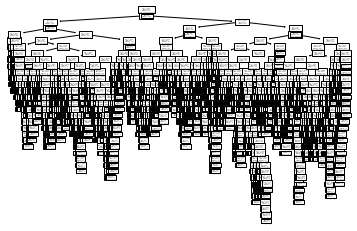

In [21]:
tree.plot_tree(DT_nD)

In [22]:
DT_nD.get_n_leaves()

1321

In [23]:
target_0_X=X_train.iloc[np.array(y_train)==0,:]
target_1_X=X_train.iloc[np.array(y_train)==1,:]
target_2_X=X_train.iloc[np.array(y_train)==2,:]

In [24]:
import plotly.graph_objects as go
fig = go.Figure(data=[
                      
                go.Scatter3d(
                x=target_0_X.iloc[:,0],
                y=target_0_X.iloc[:,1],
                z=target_0_X.iloc[:,2],
                mode='markers',
                marker=dict(size=1,color='blue')),

                go.Scatter3d(
                x=target_1_X.iloc[:,0],
                y=target_1_X.iloc[:,1],
                z=target_1_X.iloc[:,2],
                mode='markers',
                marker=dict(size=1,color='red')),
                
                go.Scatter3d(
                x=target_2_X.iloc[:,0],
                y=target_2_X.iloc[:,1],
                z=target_2_X.iloc[:,2],
                mode='markers',
                marker=dict(size=1,color='green')),
])
fig.show()

ccp_alpha<br/>class_weight=None<br/>
max_depth=None<br/>max_leaf_nodes=None

In [25]:
ccp=tree.DecisionTreeClassifier().cost_complexity_pruning_path(x_train,y_train)

In [26]:
ccp_alpha=ccp.ccp_alphas[:]

In [27]:
ccp_alpha=ccp_alpha[:60]

In [28]:
ccp_alpha

array([0.00000000e+00, 1.86513430e-05, 1.86693305e-05, 1.86897090e-05,
       2.24814235e-05, 2.41265195e-05, 2.65838502e-05, 2.74068796e-05,
       2.77723046e-05, 2.79178297e-05, 2.79586959e-05, 2.79929489e-05,
       2.80354642e-05, 2.80537807e-05, 2.81381764e-05, 3.67230416e-05,
       3.75301414e-05, 3.75301414e-05, 3.75301414e-05, 4.22214091e-05,
       4.69126767e-05, 4.69126767e-05, 4.92583106e-05, 4.94316462e-05,
       5.27767613e-05, 5.36183635e-05, 5.37363388e-05, 5.45380986e-05,
       5.45892966e-05, 5.46867775e-05, 5.52126119e-05, 5.52698661e-05,
       5.54330137e-05, 5.55734786e-05, 5.57378338e-05, 5.59581150e-05,
       6.75542545e-05, 6.91213375e-05, 7.01650470e-05, 7.03690151e-05,
       7.08316994e-05, 7.50602828e-05, 7.50602828e-05, 7.50602828e-05,
       8.20971843e-05, 8.44164105e-05, 8.93916577e-05, 9.31323317e-05,
       9.52688205e-05, 9.65060779e-05, 1.00080377e-04, 1.01867527e-04,
       1.05553523e-04, 1.06699885e-04, 1.10146168e-04, 1.10148834e-04,
      

In [29]:
ccp_weight_score=[]
ccp_score=[]

for ccp_alphas in ccp_alpha:
  ccp_Tree=tree.DecisionTreeClassifier(ccp_alpha=ccp_alphas)
  ccp_weight_tree=tree.DecisionTreeClassifier(ccp_alpha=ccp_alphas, class_weight='balanced')

  ccp_Tree.fit(x_train,y_train)
  ccp_weight_tree.fit(x_train,y_train)

  ccp_weight_score.append(ccp_weight_tree.score(x_test,y_test))
  ccp_score.append(ccp_Tree.score(x_test,y_test))


In [30]:
depth_weight_score=[]
depth_score=[]

rg=list(range(1,30))
for depth in rg:
  depth_tree=tree.DecisionTreeClassifier(max_depth=depth)
  depth_weight_tree=tree.DecisionTreeClassifier(max_depth=depth, class_weight='balanced')

  depth_tree.fit(x_train,y_train)
  depth_weight_tree.fit(x_train,y_train)
  
  depth_score.append(depth_tree.score(x_test,y_test))
  depth_weight_score.append(depth_weight_tree.score(x_test,y_test))

In [31]:
leaf_weight_score=[]
leaf_score=[]

lf=DT.get_n_leaves()
leaf_range=list(range(10,lf+10,10))
for leaf in leaf_range:
  leaf_tree=tree.DecisionTreeClassifier(max_leaf_nodes=leaf)
  leaf_weight_tree=tree.DecisionTreeClassifier(max_leaf_nodes=leaf, class_weight='balanced')
  
  leaf_tree.fit(x_train,y_train)
  leaf_weight_tree.fit(x_train,y_train)
  
  leaf_score.append(leaf_tree.score(x_test,y_test))
  leaf_weight_score.append(leaf_weight_tree.score(x_test,y_test))

cpp_alpha

In [35]:
import plotly.offline as py

fig=go.Figure()

fig.add_trace(
    go.Scatter(x=ccp_alpha,y=ccp_score, mode='lines', name='score')
)

fig.add_trace(
    go.Scatter(x=ccp_alpha,y=ccp_weight_score, mode='lines', name='weight_score')
)

depth

In [33]:
import plotly.offline as py
fig=go.Figure()
fig.add_trace(
    go.Scatter(x=rg,y=depth_score, mode='lines', name='depth_score')
)

fig.add_trace(
    go.Scatter(x=rg,y=depth_weight_score, mode='lines', name='depth_weight_score')
)

In [34]:
import plotly.offline as py
fig=go.Figure()
fig.add_trace(
    go.Scatter(x=leaf_range,y=leaf_score, mode='lines', name='leaf_score')
)

fig.add_trace(
    go.Scatter(x=leaf_range,y=leaf_weight_score, mode='lines', name='leaf_weight_score')
)